### 統計學習與深度學習
### Homework 4

請將IPYNB檔上傳至COOL作業區。回答作業時建議使用 "三明治" 答題法。也就是說，先說明要做什麼，然後列出程式碼與結果，最後說明這些結果的意義。作業自己做。嚴禁抄襲。不接受紙本繳交，不接受遲交。請以英文或中文作答。

#### Multilayer Perceptrons for Regression
本次作業的主角是 Multilayer perceptrons (MLP)。我們將以MLP建構迴歸模型，探討各項相關議題。


#### Dataset: Million Songs Dataset
本次作業將使用"Million Songs Dataset"作為訓練與測試資料。請使用`pickle.load()`載入*msd_full.pickle*。這個資料集已經切割好了訓練與測試資料，並存放在一個Dictionary的結構。這個Dictionary有四個元素，x_train, y_train, x_test, y_test，分別對應到訓練特徵、訓練標記(Label)、測試特徵、測試標記。 標記變數 (label variable; i.e., $y$) 是歌曲發行年度。特徵為歌曲的聲音特性。迴歸任務為預測歌曲年分。

#### Prediction Performance and Loss Function
模型訓練應主要使用Sum of Squared Error (SSE)建構Loss Function，另外我們也會練習使用其他種類的Loss Function。為了讓圖表易於理解，不論Loss Function為何，報告預測能力應使用Root Mean Squared Error (RMSE)。使用SSE或RMSE建構Loss Function在本質上沒有差別。但SSE計算成本稍低，而RMSE較有直觀意義。


#### Subtraining, Validation, and Test Datasets
*msd_full.pickle* 檔案中的訓練資料已經隨機排序過。你應該使用訓練資料最後10%的資料做為Validation Set。其餘的前90%做為Subtraining Set。使用Subtraining Set來訓練資料，並以Validation Set作為參數調教與Early Stopping的依據。Test RMSE應使用測試資料計算得之。

所有特徵應該標準化(均數為零，變異數為一)。標準化應該以訓練資料(注意不是Test Set or Subtraining Set)的統計量為之。標記變數(i.e., $y$)應將均數平移至0 (依照訓練資料的統計量)。標記變數的變異數不要調整。


#### Minibatch, Epoch, and Early Stopping
如果沒有特別說明，模型訓練時應以大小為1,000個資料點的Minibatch為之。模型使用一個Minibatch的資料更新參數之後稱為經歷了一個Batch。當所有Subtraining資料已經用來更新過模型參數，稱為經過了一個Epoch。

模型訓練應使用Early Stopping決定最佳的模型。模型訓練時每100個Batch計算一次Training and Validation RMSE。如果Validation為歷史最低，則記下當下的模型參數與當時已進行的Batch數量，稱為best_step_count。如由best_step_count起算已經經過了5,000個Batch而沒有更好的Validation RMSE，則停止模型訓練，並以best_step_count時的模型參數做為最後的模型訓練結果。如果模型訓練最多執行100個epoch。如果模型已經執行了100個epoch而沒有Early Stop，則應使用歷史最佳的Validation RMSE所對應到的模型參數計算Test RMSE。


#### Implementation Restriction
使用Pytorch建構MLP模型。Ordinary Least Square (OLS)模型訓練沒有限制使用何種套件。

#### 資料載入
使用下面的程式碼載入資料:

In [3]:
#load packages
%matplotlib inline
import pickle
from sklearn import preprocessing

#Load data
with open('/content/msd_full.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

doscaling = 1
if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test'].astype('float32')
X_test = X_test.astype('float32')

y_mean = Y_train.mean()
Y_train_keep = Y_train.copy()
Y_test_keep = Y_test.copy()
Y_train = Y_train - y_mean
Y_test = Y_test - y_mean


#validation is the last 10% of training, subtraining is the first 90% of training
nvalid = int(X_train.shape[0] * 0.1)
nsubtrain = X_train.shape[0] - nvalid

X_subtrain = X_train[0:nsubtrain, :].astype('float32')
X_valid = X_train[nsubtrain:, :].astype('float32')
Y_subtrain = Y_train[0:nsubtrain].astype('float32')
Y_valid = Y_train[nsubtrain:].astype('float32')

Y_subtrain_keep = Y_train_keep[0:nsubtrain].astype('float32')
Y_valid_keep = Y_train_keep[nsubtrain:].astype('float32')

print("X_train shape = ", X_train.shape)
print("X_subtrain shape = ", X_subtrain.shape)
print("X_valid shape = ", X_valid.shape)
print("Y_subtrain shape = ", Y_subtrain.shape)
print("Y_valid shape = ", Y_valid.shape)
print("X_test shape = ", X_test.shape)

X_train shape =  (463715, 90)
X_subtrain shape =  (417344, 90)
X_valid shape =  (46371, 90)
Y_subtrain shape =  (417344,)
Y_valid shape =  (46371,)
X_test shape =  (51630, 90)


### 回答下面問題

#### Q1 (5%)
使用Training資料訓練一個Ordinary Least Square模型，並進行預測。列出此模型的RMSE與前五個特徵的參數。OLS模型應包含常數項，且不應有任何Regularization。




* 首先撰寫計算RMSE的function
* 使用sklearn.linear_model的LinearRegression，fit(X_train,Y_train)，Predict(X_test)後印出RMSE和前五個coef

In [4]:
import numpy as np

def rmse(y, y_pred)    
  return np.sqrt(np.mean((y_pred - y)**2))

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, Y_train)
y_pred = reg.predict(X_test)
print('RMSE: ', rmse(Y_test, y_pred))
reg.coef_[:5]

RMSE:  9.510160684544399


array([ 5.30975265, -2.88088114, -1.53234348,  0.05737583, -0.33952889])

* OLS的RMSE為：9.510160684544399

#### Q2 MLP with Four Hidden Layers (15%)
建構一個有四層Hidden Layer的MLP。此模型由輸入層開始，第一層由90個Input Features通過線性層轉換為H個Hidden Nodes，通過ReLu Activation Function之後進入下一個線性層與ReLu Activation Function。如此再重複兩次線性層與Activation的疊加之後，通過一個線性層輸出。所有Hidden Layer的寬度都為H。

令H= 45, 使用Stochastic Gradient Descent更新參數，設Learning Rate = 0.00001，無Weight Decay與Momentum。畫出模型訓練過程中的Training與Validation RMSE，列出Test RMSE。 並討論訓練過程中Training與Validation RMSE的圖形意義。

In [5]:
import torch

torch.cuda.is_available()

False

* 依序建立Dataset, Dataloader


In [6]:
from torch.utils import data

class Dataset(data.Dataset)    
  'Characterizes a dataset for PyTorc    
  def __init__(self, Xnp, Yn        
    'Initialization, passing Xnp and         
    self.labels         p
    self.nobs = Xnp.shape[0]            
    self.Xn        Xnp
    self.Y     = Ynp
  def __len        elf):
    'Denotes the total number o        mples'
    retur    self.nobs
  def __getitem__(s         index):
    'Generates one sample of         '        
    X = s        Xnp[index]
    y =         .Ynp[index]
    return X, y
    
#y_train is a np    
trainset = Dataset(X_subtrain, Y_subtrain)    
validset = Dataset(X_valid, Y_valid)
testset = Dataset(X_test, Y_test)

In [7]:
trainloader = data.DataLoader(trainset, batch_size=1000, shuffle=True, num_workers=0)
validloader = data.DataLoader(validset, batch_size=X_valid.shape[0], shuffle=True, num_workers=0)
testloader = data.DataLoader(testset, batch_size=X_test.shape[0], shuffle=True, num_workers=0)

* 按照題目指示搭建深度學習網路，將參數輸出成pt檔

In [ ]:
#get number of input features
D_in = trainset.Xnp.shape[1]
H = 45
#Binary classification problem
D_out = 1
use_cuda = torch.cuda.is_available()
if use_cuda:
    device = "cuda"   
else:
    device = "cpu"
print("Running on device: ", device)
net = torch.nn.Sequential(
        torch.nn.Linear(D_in, H),  
        torch.nn.ReLU(),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, D_out),
        torch.nn.Sigmoid()
)
# convert everything to float precision. 
net = net.float()
# move the model to device (i.e., cpu or gpu)
net = net.to(device)

Running on device:  cuda


In [12]:
# define the optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.00001, momentum=0, weight_decay=0)

# L2 loss (SSE)
loss_fn = torch.nn.MSELoss()

* 使用.state_dict()紀錄最好的模型參數

In [ ]:
nepoch = 100
step_count = 0
log_interval = 100

# For tuning
min_rmse = 100
best_step_count = 0
patience = 50
early_stop_count = 0
PATH = '/content/q2.pt'

# For draw
train_l = []
valid_l = []

for epoch_id in range(0,     poch):      
  for batch_idx, (inputs, targets) in enumerat        ainloader):
    #reshape target to two-d        sional array
    targets = targets        hape((-1, 1))
    step_        t += 1                  net.train()
    inputs, targets = inputs.to(device)        rgets.to(device)
            mizer.zero_grad()
    outputs        et(inputs)        
    loss = lo        n(outputs, targe        
    loss.backwar        
    optimizer.step()
    if step_count % log_l            em(), len(tar            )

      # Train RMSE
      tra            ppend(torch.s            ss))

      # Valida                    with torch.no_grad():
        for batch_idx, (inputs, targets) in e                    alidloader):            
          inputs, targets = in                    vice), targets.to(device)
                            = targets.reshape((-1, 1))
                      tputs = net(inputs)        
                            = loss_fn(outputs, targets)

                  lid_l.append(torch.sqrt(cn_loss))                 if valid_l[-1].item(                rmse:
        early_stop_cou                        best_step_count = step                        min_rmse = valid_l[-1].item            count,                [-1].item(), len(target                  else:
        early_stop_c                1

      if early_stop_count >= patience:
        break


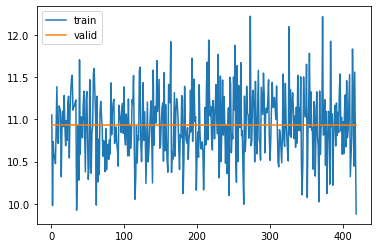

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(train_l)+1), train_l, label='train')
plt.plot(range(1, len(train_l)+1), valid_l, label='valid')
plt.legend(loc='best')

* 模型沒有early stop
* valid RMSE有緩慢的下降，但train RMSE反映模型似乎已經遇到學習困難

* 利用.load_state_dict()還原最好的模型參數

In [ ]:
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
with torch.no_grad():     for batch_idx, (inputs, targets) in enumerate(testloader):                      inputs, targets = inputs.to(device), targets.to(device           targets = targets.reshape((-1, 1            outputs = net(inputs)             
    cn_loss = loss_fn(outputs, targets)

print('Test RMSE:', torch.sqrt(cn_loss).item())

Test RMSE: 10.8574800491333


* Test RMSE為10.8574800491333
* 差於OLS模型



#### Q3 (10%)
重複上題步驟，使用H = 90與180。無須畫訓練過程的RMSE。列出這兩個Test RMSE。討論H = 45, 90, 180的Test RMSE。



* 按照題目指示搭建深度學習網路，將參數輸出成pt檔


In [ ]:
H_list = [90, 180]

for H in H_list    
  #get number of input featur    
  D_in = trainset.Xnp.shape    ]
  D_out     1
  use_cuda = torch.cuda.is_availa    e()
  if use        a:
    device = "c    a"           lse:
    devic    = "cpu"
  net = torch.nn.S        ntial(
    torch.nn.Linear(        , H),  
    torc        .ReLU(),
    torch.nn.        ar(H, H),
    to        nn.ReLU(),
    torch.n        near(H, H),
            h.nn.ReLU(),
    torch        Linear(H, H),
          rch.nn.ReLU(),
    torch.n        near(H, D_out),
      to    h.nn.Sigmoid()
  )
  # convert everythin    to float precision    
  net = net.float()
  # move the model to d    ice (i.e., cpu or gpu)      net = net.to(device)

  optimizer = torch.optim.SGD(net.parameters(), lr=0.00001, m    entum=0, weig    _decay=0)

      poch = 100
  step_c    nt = 0
  log    nterval = 100
      # For tuning
  mi    rmse = 100
 
    st_step_count = 0
      tience = 50
  early_stop_count = 0     PATH = '/content/q3_'+str(H)+'.pt'

          epoch_id in range(0, nepoch):      
    for batch_idx, (in            targets) in enumerate(trainloader):
                hape target to two-dimensional arra               targets = targets.res            -1, 1))
               p_count += 1        
      net.train()
      inputs, t             = inputs.to(device),             s.to(device)
      optimizer.            rad()
      outputs = net(inputs               
      loss             _fn(outputs, targ                  loss.backward()
      optimizer.step()
                 step_count %                 rval == 0:                                  # Validation
        with torch.no_grad():
          for batch_idx,                         gets) in enumerate(validloader):            
                                  rgets = inputs.to(device), targets.                                    targets = targets.                         1))
            outputs = net(input                          
            cn_loss = loss_fn(outputs,                            

        if torch.s                            s).item() < min_rmse:
                                  stop_count = 0
          best_step_co                            _count
          min_rmse = torch.                        % (epo                            p_count, valid_l[-1].it                        n(targets)))
        else:
                                y_stop_co    t += 1    
        if early_stop_count >= patien    :
          break
          # Test
  net.load_state_dict(torch.load(PATH))
  with torch.no_grad()             for batch_idx, (inputs, targets) in enumerate(testloade                     
      inputs, targets =             .to(device), targets.to(device               targets = targets.reshape((-1, 1))          outputs = net(inputs)        
      cn_loss = loss_fn(outputs, targets)

  print('Test RMSE:', torch.sqrt(cn_loss).item())

Test RMSE: 10.85815715789795
Test RMSE: 10.856585502624512


* H=90的RMSE為10.85815715789795
* H=180的RMSE為10.856585502624512
* Test RMSE H=180 < 45 < 90，且表現都比OLS差

#### Q4 (15%)
使用Q2的模型設定，考慮 H = 45, 90, 180與Weight Decay = 0.1, 0.2, 0.4的所有組合。模型估計後做表整理Test RMSE。討論H的選擇應為多少較合理?



* 按照題目指示搭建深度學習網路，將參數輸出成pt檔


In [ ]:
decay = [0.1, 0.2, 0.4]
H_list = [45, 90, 180]

for d in decay:

  for H in H_list:
    #get number of input features
    D_in = trainset.Xnp.shape[1]
    D_out = 1
    use_cuda = torch.cuda.is_available()
    if use_cuda:
      device = "cuda"   
    else:
      device = "cpu"
    net = torch.nn.Sequential(
      torch.nn.Linear(D_in, H),  
      torch.nn.ReLU(),
      torch.nn.Linear(H, H),
      torch.nn.ReLU(),
      torch.nn.Linear(H, H),
      torch.nn.ReLU(),
      torch.nn.Linear(H, H),
      torch.nn.ReLU(),
      torch.nn.Linear(H, D_out),
      torch.nn.Sigmoid()
    )
    # convert everything to float precision. 
    net = net.float()
    # move the model to device (i.e., cpu or gpu)
    net = net.to(device)

    optimizer = torch.optim.SGD(net.parameters(), lr=0.00001, momentum=0, weight_decay=d)

    nepoch = 100
    step_count = 0
    log_interval = 100

    # For tuning
    min_rmse = 100
    best_step_count = 0
    patience = 50
    early_stop_count = 0
    PATH = '/content/q4_'+str(H)+'_'+str(d)+'.pt'

    for epoch_id in range(0, nepoch):      
      for batch_idx, (inputs, targets) in enumerate(trainloader):
        #reshape target to two-dimensional array
        targets = targets.reshape((-1, 1))
        step_count += 1        
        net.train()
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)        
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()
        if step_count % log_interval == 0:            

          # Validation
          with torch.no_grad():
            for batch_idx, (inputs, targets) in enumerate(validloader):            
              inputs, targets = inputs.to(device), targets.to(device)
              targets = targets.reshape((-1, 1))
              outputs = net(inputs)        
              cn_loss = loss_fn(outputs, targets)

          if torch.sqrt(cn_loss).item() < min_rmse:
            early_stop_count = 0
            best_step_count = step_count
            min_rmse = torch.sqrt(cn_loss).item()
            torch.save(net.state_dict(), PATH)
            # print("Epoch %d Step %d RMSE = %.3f (minibatch size = %d)" % (epoch_id, step_count, valid_l[-1].item(), len(targets)))
          else:
            early_stop_count += 1

          if early_stop_count >= patience:
            break
    
    # Test
    net.load_state_dict(torch.load(PATH))
    with torch.no_grad():
      for batch_idx, (inputs, targets) in enumerate(testloader):            
        inputs, targets = inputs.to(device), targets.to(device)
        targets = targets.reshape((-1, 1))
        outputs = net(inputs)        
        cn_loss = loss_fn(outputs, targets)

    print('H =', H, 'Weight Decay =', d)
    print('Test RMSE:', torch.sqrt(cn_loss).item())

H = 45 Weight Decay = 0.1
Test RMSE: 10.856684684753418
H = 90 Weight Decay = 0.1
Test RMSE: 10.856759071350098
H = 180 Weight Decay = 0.1
Test RMSE: 10.857929229736328
H = 45 Weight Decay = 0.2
Test RMSE: 10.857916831970215
H = 90 Weight Decay = 0.2
Test RMSE: 10.857169151306152
H = 180 Weight Decay = 0.2
Test RMSE: 10.857810974121094
H = 45 Weight Decay = 0.4
Test RMSE: 10.857714653015137
H = 90 Weight Decay = 0.4
Test RMSE: 10.858030319213867
H = 180 Weight Decay = 0.4
Test RMSE: 10.85773754119873


* 在Weight Decay（正規化）=0.1時，H = 45, 90變好。
* 0.2與0.4時，剩H = 90變好。
* H = 45與90較有機會透過正規化降低RMSE。
* 又以H = 90和Weight Decay = 0.1的表現平均而言較好。

#### Q5 MLP with Dropout (15%)
建構一個有Dropout的四層Hidden Layer的MLP。此模型由輸入層開始，第一層由90個Input Features通過線性層轉換為H個Hidden Nodes，通過ReLu Activation Function，之後對Hidden Unit Dropout，機率為0.5。後面各Hidden Lyaer均在ReLu後有Dropout，機率皆為0.5。最後通過一個線性層輸出。所有Hidden Layer的寬度都為H。

令H= 90, 使用Adaptive Moment Estimation (Adam)更新參數，設Learning Rate = 0.001，無Weight Decay與Momentum，其他參數使用預設值。畫出模型訓練過程中的Training與Validation RMSE，列出Test RMSE。 並討論訓練過程中Training與Validation RMSE的圖形意義。



* 按照題目指示搭建深度學習網路，將參數輸出成pt檔
* 將net function化


In [8]:
use_cuda = torch.cuda.is_available()
if use_cuda:
    device = "cuda"   
else:
    device = "cpu"

In [10]:
def get_net_dropout(H):
  #get number of input features
  D_in = trainset.Xnp.shape[1]
  #Binary classification problem
  D_out = 1
  net = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),  
          torch.nn.ReLU(),
          torch.nn.Dropout(0.5),
          torch.nn.Linear(H, H),
          torch.nn.ReLU(),
          torch.nn.Dropout(0.5),
          torch.nn.Linear(H, H),
          torch.nn.ReLU(),
          torch.nn.Dropout(0.5),
          torch.nn.Linear(H, H),
          torch.nn.ReLU(),
          torch.nn.Dropout(0.5),
          torch.nn.Linear(H, D_out),
          torch.nn.Sigmoid()
  )
  # convert everything to float precision. 
  net = net.float()
  return net

In [ ]:
net = get_net_dropout(90)
# move the model to device (i.e., cpu or gpu)
net = net.to(device)

Running on device:  cuda


In [ ]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.001, weight_decay=0)

In [ ]:
nepoch = 100
step_count = 0
log_interval = 100

# For tuning
min_rmse = 100
best_step_count = 0
patience = 50
early_stop_count = 0
PATH = '/content/q5.pt'

# For draw
train_l = []
valid_l = []

for epoch_id in range(0, nepoch):      
  for batch_idx, (inputs, targets) in enumerate(trainloader):
    #reshape target to two-dimensional array
    targets = targets.reshape((-1, 1))
    step_count += 1        
    net.train()
    inputs, targets = inputs.to(device), targets.to(device)
    optimizer.zero_grad()
    outputs = net(inputs)        
    loss = loss_fn(outputs, targets)
    loss.backward()
    optimizer.step()
    if step_count % log_interval == 0:            
      # print("Epoch %d Step %d Loss = %.3f (minibatch size = %d)" % (epoch_id, step_count, loss.item(), len(targets)))

      # Train RMSE
      train_l.append(torch.sqrt(loss))

      # Validation
      with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(validloader):            
          inputs, targets = inputs.to(device), targets.to(device)
          targets = targets.reshape((-1, 1))
          outputs = net(inputs)        
          cn_loss = loss_fn(outputs, targets)

          valid_l.append(torch.sqrt(cn_loss))

      if valid_l[-1].item() < min_rmse:
        early_stop_count = 0
        best_step_count = step_count
        min_rmse = valid_l[-1].item()
        torch.save(net.state_dict(), PATH)
        # print("Epoch %d Step %d RMSE = %.3f (minibatch size = %d)" % (epoch_id, step_count, valid_l[-1].item(), len(targets)))
      else:
        early_stop_count += 1

      if early_stop_count >= patience:
        break

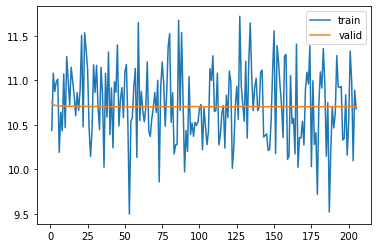

In [ ]:
plt.plot(range(1, len(train_l)+1), train_l, label='train')
plt.plot(range(1, len(train_l)+1), valid_l, label='valid')
plt.legend(loc='best')

In [ ]:
with torch.no_grad():
  for batch_idx, (inputs, targets) in enumerate(testloader):            
    inputs, targets = inputs.to(device), targets.to(device)
    targets = targets.reshape((-1, 1))
    outputs = net(inputs)        
    cn_loss = loss_fn(outputs, targets)

print('Test RMSE:', torch.sqrt(cn_loss).item())

Test RMSE: 10.639755249023438


* 模型有early stop（收斂），且最左邊的地方valid RMSE下降的比較明顯
* Test RMSE為10.639755249023438，較不dropout的所有情況都來得低，但還是高於OLS

#### Q6 Explore Number of Hidden Units (10%)
使用上題的模型，考慮H = 20, 180, 360。 討論H = 20, 45, 180, 360的Test RMSE。



* 按照題目指示搭建深度學習網路，將參數輸出成pt檔


In [13]:
H_list = [20, 45, 180, 360]

for H in H_list:
  
  net = get_net_dropout(H)
  # move the model to device (i.e., cpu or gpu)
  net = net.to(device)

  optimizer = torch.optim.Adam(net.parameters(), lr=0.001, weight_decay=0)

  nepoch = 100
  step_count = 0
  log_interval = 100

  # For tuning
  min_rmse = 100
  best_step_count = 0
  patience = 50
  early_stop_count = 0
  PATH = '/content/q6_'+str(H)+'.pt'

  for epoch_id in range(0, nepoch):      
    for batch_idx, (inputs, targets) in enumerate(trainloader):
      #reshape target to two-dimensional array
      targets = targets.reshape((-1, 1))
      step_count += 1        
      net.train()
      inputs, targets = inputs.to(device), targets.to(device)
      optimizer.zero_grad()
      outputs = net(inputs)        
      loss = loss_fn(outputs, targets)
      loss.backward()
      optimizer.step()
      if step_count % log_interval == 0:            

        # Validation
        with torch.no_grad():
          for batch_idx, (inputs, targets) in enumerate(validloader):            
            inputs, targets = inputs.to(device), targets.to(device)
            targets = targets.reshape((-1, 1))
            outputs = net(inputs)        
            cn_loss = loss_fn(outputs, targets)

        if torch.sqrt(cn_loss).item() < min_rmse:
          early_stop_count = 0
          best_step_count = step_count
          min_rmse = torch.sqrt(cn_loss).item()
          torch.save(net.state_dict(), PATH)
          # print("Epoch %d Step %d RMSE = %.3f (minibatch size = %d)" % (epoch_id, step_count, valid_l[-1].item(), len(targets)))
        else:
          early_stop_count += 1

        if early_stop_count >= patience:
          break
  
  # Test
  net.load_state_dict(torch.load(PATH))
  with torch.no_grad():
    for batch_idx, (inputs, targets) in enumerate(testloader):            
      inputs, targets = inputs.to(device), targets.to(device)
      targets = targets.reshape((-1, 1))
      outputs = net(inputs)        
      cn_loss = loss_fn(outputs, targets)

  print('H =', H, 'Test RMSE:', torch.sqrt(cn_loss).item())

H = 20 Test RMSE: 10.640788078308105
H = 45 Test RMSE: 10.632692337036133
H = 180 Test RMSE: 10.639541625976562
H = 360 Test RMSE: 10.643932342529297


* Test RMSE由小至大依序為H = 45, 180, 90, 20, 360
* 整體表現差異不大，都比不dropout好，但差於OLS

#### Q7 L2 + L1 Loss (15%)
我們前面的小題皆是使用SSE，也就是L2 Loss。一個改善模型訓練的方式是使用多種類似的Loss，以線性組合的方式建構Loss Function。請使用Q5中的MLP with Dropout模型 (H = 90)，並以L2 + L1 Loss訓練模型。這個Loss的定義如下:

$$
loss(\mathbf{y}, \hat{\mathbf{y}}) = z \sum_{i=1}^n (y_i - \hat{y}_i)^2 + (1 - z) \sum_{i = 1}^n | y_i - \hat{y}_i |,
$$
其中z為實數且$0 <=z <= 1$。

使用z = 0.5。並以Adam訓練模型。畫出Training and Validation RMSE，並報告Test RMSE。注意這裡繪圖時應使用RMSE而不是這個特殊的Loss。

另外，使用z = 0.0, 0.1, 0.9, 1.0訓練模型(不須提供訓練過程的Loss圖形)，統整各個z值下的Test RMSE並討論。



* 按照題目指示搭建深度學習網路，將參數輸出成pt檔


In [16]:
net = get_net_dropout(90)
# move the model to device (i.e., cpu or gpu)
net = net.to(device)

optimizer = torch.optim.Adam(net.parameters(), lr=0.001, weight_decay=0)

In [17]:
nepoch = 100
step_count = 0
log_interval = 100

# For tuning
min_rmse = 100
best_step_count = 0
patience = 50
early_stop_count = 0
PATH = '/content/q7.pt'

# For draw
train_l = []
valid_l = []

for epoch_id in range(0, nepoch):      
  for batch_idx, (inputs, targets) in enumerate(trainloader):
    #reshape target to two-dimensional array
    targets = targets.reshape((-1, 1))
    step_count += 1        
    net.train()
    inputs, targets = inputs.to(device), targets.to(device)
    optimizer.zero_grad()
    outputs = net(inputs)        
    L2_loss = loss_fn(outputs, targets)
    L1_loss = torch.nn.L1Loss()(outputs, targets)
    loss = 0.5*L2_loss + 0.5*L1_loss
    loss.backward()
    optimizer.step()
    if step_count % log_interval == 0:            
      # print("Epoch %d Step %d Loss = %.3f (minibatch size = %d)" % (epoch_id, step_count, loss.item(), len(targets)))

      # Train RMSE
      train_l.append(torch.sqrt(L2_loss))

      # Validation
      with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(validloader):            
          inputs, targets = inputs.to(device), targets.to(device)
          targets = targets.reshape((-1, 1))
          outputs = net(inputs)        
          cn_loss = loss_fn(outputs, targets)

          valid_l.append(torch.sqrt(cn_loss))

      if valid_l[-1].item() < min_rmse:
        early_stop_count = 0
        best_step_count = step_count
        min_rmse = valid_l[-1].item()
        torch.save(net.state_dict(), PATH)
        # print("Epoch %d Step %d RMSE = %.3f (minibatch size = %d)" % (epoch_id, step_count, valid_l[-1].item(), len(targets)))
      else:
        early_stop_count += 1

      if early_stop_count >= patience:
        break

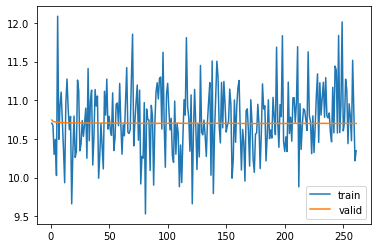

In [19]:
plt.plot(range(1, len(train_l)+1), train_l, label='train')
plt.plot(range(1, len(train_l)+1), valid_l, label='valid')
plt.legend(loc='best')

* 模型有Early Stop
* 一開始loss下降的趨勢又更明顯一些。

In [20]:
with torch.no_grad():
  for batch_idx, (inputs, targets) in enumerate(testloader):            
    inputs, targets = inputs.to(device), targets.to(device)
    targets = targets.reshape((-1, 1))
    outputs = net(inputs)        
    cn_loss = loss_fn(outputs, targets)

print('Test RMSE:', torch.sqrt(cn_loss).item())

Test RMSE: 10.6332368850708


* Test RMSE為10.6332368850708，稍稍差於H=45的dropout
* 還是差於OLS


In [21]:
z_list = [0.0, 0.1, 0.9, 1.0]

for z in z_list:

  net = get_net_dropout(90)
  # move the model to device (i.e., cpu or gpu)
  net = net.to(device)

  optimizer = torch.optim.Adam(net.parameters(), lr=0.001, weight_decay=0)

  nepoch = 100
  step_count = 0
  log_interval = 100

  # For tuning
  min_rmse = 100
  best_step_count = 0
  patience = 50
  early_stop_count = 0
  PATH = '/content/q7_'+str(z)+'.pt'

  for epoch_id in range(0, nepoch):      
    for batch_idx, (inputs, targets) in enumerate(trainloader):
      #reshape target to two-dimensional array
      targets = targets.reshape((-1, 1))
      step_count += 1        
      net.train()
      inputs, targets = inputs.to(device), targets.to(device)
      optimizer.zero_grad()
      outputs = net(inputs)        
      L2_loss = loss_fn(outputs, targets)
      L1_loss = torch.nn.L1Loss()(outputs, targets)
      loss = z*L2_loss + (1-z)*L1_loss
      loss.backward()
      optimizer.step()
      if step_count % log_interval == 0:            

        # Validation
        with torch.no_grad():
          for batch_idx, (inputs, targets) in enumerate(validloader):            
            inputs, targets = inputs.to(device), targets.to(device)
            targets = targets.reshape((-1, 1))
            outputs = net(inputs)        
            cn_loss = loss_fn(outputs, targets)

        if torch.sqrt(cn_loss).item() < min_rmse:
          early_stop_count = 0
          best_step_count = step_count
          min_rmse = torch.sqrt(cn_loss).item()
          torch.save(net.state_dict(), PATH)
          # print("Epoch %d Step %d RMSE = %.3f (minibatch size = %d)" % (epoch_id, step_count, valid_l[-1].item(), len(targets)))
        else:
          early_stop_count += 1

        if early_stop_count >= patience:
          break
  
  # Test
  net.load_state_dict(torch.load(PATH))
  with torch.no_grad():
    for batch_idx, (inputs, targets) in enumerate(testloader):            
      inputs, targets = inputs.to(device), targets.to(device)
      targets = targets.reshape((-1, 1))
      outputs = net(inputs)        
      cn_loss = loss_fn(outputs, targets)

  print('z =', z, 'Test RMSE:', torch.sqrt(cn_loss).item())

z = 0.0 Test RMSE: 10.642412185668945
z = 0.1 Test RMSE: 10.63064193725586
z = 0.9 Test RMSE: 10.63640022277832
z = 1.0 Test RMSE: 10.63419246673584


* Test RMSE由小到大對應的z為：0.1 < 0.5 < 1.0 < 0.9 < 0.0
* RMSE皆差異不大，然而純用L1 loss (0.0)的效果並不好
* 還是差於OLS

#### Q8 L2 + Customerized Loss (15%)
考慮另一個比較特別的Loss Function

$$
qloss(\mathbf{y}, \hat{\mathbf{y}}) = \sum_{i=1}^n \{ q (y_i - \hat{y}_i)_+ + (1 - q) (\hat{y}_i - y_i)_+ \},
$$
其中q為參數且$0<=q<=1$，而$(y_i - \hat{y}_i)_+$是取正值的意思。也就是說如果$(y_i - \hat{y}_i) > 0$，則$(y_i - \hat{y}_i)_+ = y_i - \hat{y}_i$，否則$(y_i - \hat{y}_i)_+ = 0$。

令模型的Loss為$z \sum_{i=1}^n (y_i - \hat{y}_i)^2 + (1 - z) \sum_{i=1}^n \{ 0.5 (y_i - \hat{y}_i)_+ + 0.5 (\hat{y}_i - y_i)_+ \} $。請使用Q5中的MLP with Dropout模型(H = 90)，令z = 0。並以Adam訓練模型。畫出Training and Validation RMSE，並報告Test RMSE。注意這裡繪圖時應使用RMSE而不是這個特殊的Loss。

另外，使用z = 0.1, 0.5, 0.9, 1.0訓練模型(不須提供訓練過程的Loss圖形)，統整各個z值下的Test RMSE並討論。

* 按照題目指示搭建深度學習網路，將參數輸出成pt檔
* 建立my_loss之function，透過relu實作取正值

In [22]:
def my_loss(output, target):
  loss = 0.5*torch.nn.ReLU()(output-target) + 0.5*torch.nn.ReLU()(target-output)
  loss = torch.mean(loss)
  return loss

In [23]:
net = get_net_dropout(90)
# move the model to device (i.e., cpu or gpu)
net = net.to(device)

optimizer = torch.optim.Adam(net.parameters(), lr=0.001, weight_decay=0)

nepoch = 100
step_count = 0
log_interval = 100

# For tuning
min_rmse = 100
best_step_count = 0
patience = 50
early_stop_count = 0
PATH = '/content/q8.pt'

# For draw
train_l = []
valid_l = []

for epoch_id in range(0, nepoch):      
  for batch_idx, (inputs, targets) in enumerate(trainloader):
    #reshape target to two-dimensional array
    targets = targets.reshape((-1, 1))
    step_count += 1        
    net.train()
    inputs, targets = inputs.to(device), targets.to(device)
    optimizer.zero_grad()
    outputs = net(inputs)        
    loss = my_loss(outputs, targets)
    loss.backward()
    optimizer.step()
    if step_count % log_interval == 0:            
      # print("Epoch %d Step %d Loss = %.3f (minibatch size = %d)" % (epoch_id, step_count, loss.item(), len(targets)))

      # Train RMSE
      L2_loss = loss_fn(outputs, targets)
      train_l.append(torch.sqrt(L2_loss))

      # Validation
      with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(validloader):            
          inputs, targets = inputs.to(device), targets.to(device)
          targets = targets.reshape((-1, 1))
          outputs = net(inputs)        
          cn_loss = loss_fn(outputs, targets)

          valid_l.append(torch.sqrt(cn_loss))

      if valid_l[-1].item() < min_rmse:
        early_stop_count = 0
        best_step_count = step_count
        min_rmse = valid_l[-1].item()
        torch.save(net.state_dict(), PATH)
        # print("Epoch %d Step %d RMSE = %.3f (minibatch size = %d)" % (epoch_id, step_count, valid_l[-1].item(), len(targets)))
      else:
        early_stop_count += 1

      if early_stop_count >= patience:
        break

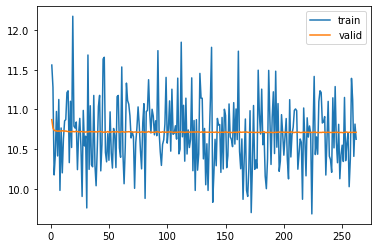

In [24]:
plt.plot(range(1, len(train_l)+1), train_l, label='train')
plt.plot(range(1, len(train_l)+1), valid_l, label='valid')
plt.legend(loc='best')

* 訓練有early stop
* 一開始loss下降得最明顯

In [25]:
with torch.no_grad():
  for batch_idx, (inputs, targets) in enumerate(testloader):            
    inputs, targets = inputs.to(device), targets.to(device)
    targets = targets.reshape((-1, 1))
    outputs = net(inputs)        
    cn_loss = loss_fn(outputs, targets)

print('Test RMSE:', torch.sqrt(cn_loss).item())

Test RMSE: 10.646892547607422


* Test RMSE為10.646892547607422，較Q5和Q7高


In [26]:
z_list = [0.1, 0.5, 0.9, 1.0]

for z in z_list:

  net = get_net_dropout(90)
  # move the model to device (i.e., cpu or gpu)
  net = net.to(device)

  optimizer = torch.optim.Adam(net.parameters(), lr=0.001, weight_decay=0)
  
  nepoch = 100
  step_count = 0
  log_interval = 100

  # For tuning
  min_rmse = 100
  best_step_count = 0
  patience = 50
  early_stop_count = 0
  PATH = '/content/q8_'+str(z)+'.pt'

  for epoch_id in range(0, nepoch):      
    for batch_idx, (inputs, targets) in enumerate(trainloader):
      #reshape target to two-dimensional array
      targets = targets.reshape((-1, 1))
      step_count += 1        
      net.train()
      inputs, targets = inputs.to(device), targets.to(device)
      optimizer.zero_grad()
      outputs = net(inputs)        
      L2_loss = loss_fn(outputs, targets)
      new_loss = my_loss(outputs, targets)
      loss = z*L2_loss + (1-z)*new_loss
      loss.backward()
      optimizer.step()
      if step_count % log_interval == 0:            

        # Validation
        with torch.no_grad():
          for batch_idx, (inputs, targets) in enumerate(validloader):            
            inputs, targets = inputs.to(device), targets.to(device)
            targets = targets.reshape((-1, 1))
            outputs = net(inputs)        
            cn_loss = loss_fn(outputs, targets)

        if torch.sqrt(cn_loss).item() < min_rmse:
          early_stop_count = 0
          best_step_count = step_count
          min_rmse = torch.sqrt(cn_loss).item()
          torch.save(net.state_dict(), PATH)
          # print("Epoch %d Step %d RMSE = %.3f (minibatch size = %d)" % (epoch_id, step_count, valid_l[-1].item(), len(targets)))
        else:
          early_stop_count += 1

        if early_stop_count >= patience:
          break
  
  # Test
  net.load_state_dict(torch.load(PATH))
  with torch.no_grad():
    for batch_idx, (inputs, targets) in enumerate(testloader):            
      inputs, targets = inputs.to(device), targets.to(device)
      targets = targets.reshape((-1, 1))
      outputs = net(inputs)        
      cn_loss = loss_fn(outputs, targets)

  print('z =', z, 'Test RMSE:', torch.sqrt(cn_loss).item())

z = 0.1 Test RMSE: 10.628636360168457
z = 0.5 Test RMSE: 10.633079528808594
z = 0.9 Test RMSE: 10.634305000305176
z = 1.0 Test RMSE: 10.63422966003418


* Test RMSE由小到大對應的z為：0.1 < 0.5 < 1.0 < 0.9 < 0.0，和Q7的z排序一樣
* RMSE皆差異不大，然而純用my_loss (0.0)的效果並不好
* z = 0.1的效果為本次作業中最好，然而還是差於OLS